In [1]:
import logging
import pdb
# logging.basicConfig(level=logging.INFO)
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
%run analysis.ipynb
import pyfiglet
import numpy as np
# np.seterr(all='raise')

In [2]:
repos = [
    "ErikBrendel/LudumDare",
    # "jfree/jfreechart"
]
# = [
    # "square/okhttp",
    # "jenkinsci/jenkins",
    # "eclipse/che",
    # "elastic/elasticsearch",
    # "apache/camel"
#]

 _____      _ _    ____                     _      _    ___              _ 
| ____|_ __(_) | _| __ ) _ __ ___ _ __   __| | ___| |  / / |   _   _  __| |
|  _| | '__| | |/ /  _ \| '__/ _ \ '_ \ / _` |/ _ \ | / /| |  | | | |/ _` |
| |___| |  | |   <| |_) | | |  __/ | | | (_| |  __/ |/ / | |__| |_| | (_| |
|_____|_|  |_|_|\_\____/|_|  \___|_| |_|\__,_|\___|_/_/  |_____\__,_|\__,_|
                                                                           
                 ____                 
 _   _ _ __ ___ |  _ \  __ _ _ __ ___ 
| | | | '_ ` _ \| | | |/ _` | '__/ _ \
| |_| | | | | | | |_| | (_| | | |  __/
 \__,_|_| |_| |_|____/ \__,_|_|  \___|
                                      

updating ErikBrendel/LudumDare...
Repo is up to date!
No precalculated linguistic values found, starting calculations...
Extracting words...


Analyzing 44 files...
Found 549 classes, methods and fields!

Vectorizing words...
Instantiating BTM...
Training model...


100%|██████████| 30/30 [01:27<00:00,  2.92s/it]
/mnt/brick/home/ebrendel/myenv/lib/python3.8/site-packages/biterm/btm.py:76: RuntimeWarning: invalid value encountered in true_divide
  P_zd[i] = P_zb.sum(axis=0) / P_zb.sum(axis=0).sum()


Generating topic output...
Topic 0 | Coherence=-65.42 | Top words= util gfx image img buffer filter width loader height rgb
Topic 1 | Coherence=-73.29 | Top words= main project render frame time since 1600 900 scale last
Topic 2 | Coherence=-68.80 | Top words= util sound manager menu play option override button view music
Topic 3 | Coherence=-76.84 | Top words= logic time start background game run render option graphics2 layer
Topic 4 | Coherence=-59.02 | Top words= util web highscores host name stats system full array score
Topic 5 | Coherence=-97.63 | Top words= util override control geometry view event key bound box code
Topic 6 | Coherence=-65.97 | Top words= point object size fly logic move multiply center minus vector
Topic 7 | Coherence=-66.91 | Top words= asteroid welcome count box option press moment last check fly
Topic 8 | Coherence=-74.84 | Top words= logic player game add last laser time since update asteroid
Topic 9 | Coherence=-47.65 | Top words= height width image buffe

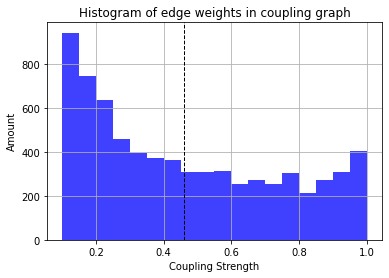

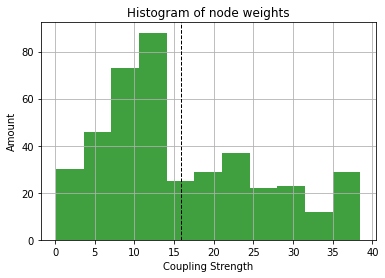

> <ipython-input-1-5a22d2834ac8>(127)visualize()
    125 
    126         pdb.set_trace()
--> 127         layout = nx.drawing.layout.kamada_kawai_layout(self.g, weight="distance") if use_spring else None
    128 
    129         # nx.draw_kamada_kawai(self.g, alpha=0.2, node_size=100)



ipdb>  c


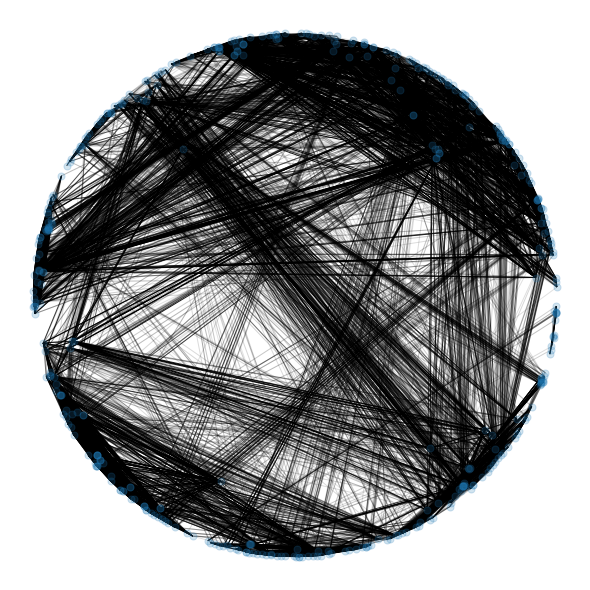



Using precalculated linguistic values

Program is over!


In [3]:
views = ["linguistic"] # ["structural", "evolutionary", "linguistic"]
for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # pdb.set_trace()
    # tree = RepoTree.init_from_repo(r)
    # print(r.get_tree())
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)
        # coupling_graph.plaintext_save(repo)
        # coupling_graph.html_save(repo)
        
        
        print("Most linked nodes:")
        debug_list = sorted(list(coupling_graph.g.edges.data()), key = lambda e: -e[2]["weight"])
        print([str(info["weight"]) + ": " + a + " <> " + b for a, b, info in debug_list[0:10]])

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.show_weight_histogram()
        coupling_graph.visualize(use_spring=False, with_labels=False)
        print("\n")
        
    analyze_disagreements([MetricManager.get(r, view) for view in views])
    
print("\nProgram is over!")